In [ ]:
import numpy as np
import gensim
import os
import re

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore
import pandas as pd

In [ ]:
filename = './imsdb_download_all_scripts/scripts/Into-the-Wild.txt'
file = open(filename, 'rt')
text = file.read().strip('\\n')
file.close()
# split into sentences
from nltk import sent_tokenize
sentences = sent_tokenize(text)
print(sentences[11])

In [ ]:
len(sentences)

In [ ]:
import spacy

In [ ]:
spacy_nlp = spacy.load('en_core_web_lg')

In [ ]:
def tokenize(text):
    doc = spacy_nlp(text)
    words = []
    for token in doc.sents:
        t = token.text
        words.append(t)
    df = pd.DataFrame(words)
    return df

In [ ]:
df = tokenize(text)

In [ ]:
df.iloc[3].values

In [ ]:
STOPWORDS = set(STOPWORDS)

def tokenize(text):
    return [token for token in simple_preprocess(text) if token not in STOPWORDS]

In [ ]:
import nltk

def tokenize(text):
    sent_text = nltk.sent_tokenize(text)
    return sent_text

In [ ]:
with open('./imsdb_download_all_scripts/scripts/Into-the-Wild.txt') as t:
    text = t.read().strip('\n')
    data = tokenize(str(text))

In [ ]:
text

In [ ]:
len(data)

In [ ]:
def chunks(l, n):
    return [l[i:i + n] for i in range(0, len(l), n)]

In [ ]:
chunks = chunks(data, 100)

In [ ]:
len(chunks)

In [ ]:
df = pd.DataFrame({'text': sentences})

In [ ]:
df.shape

In [ ]:
def tokenize(text):
    text = text.split()
    return text

In [ ]:
df['join'] = df['text'].apply(lambda x: " ".join(x))

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

In [ ]:
def sentiment_score(sentence):
    analyzer = SentimentIntensityAnalyzer()
    vs = analyzer.polarity_scores(sentence)
    compound = vs['compound']
    return compound

In [ ]:
import re
def find_caps(text):
    UPPERCASE = [word for word in text if word.isupper()]
    return UPPERCASE

In [ ]:
df['upper'] = df['tokens'].apply(lambda x: find_caps(x))

In [ ]:
df[df['upper'].str.len() >= 3]

In [ ]:
df = df[~(df['upper'].str.len() > 5)]

In [ ]:
df = df[~(df['upper'].str.len() >= 3)]

In [ ]:
df[df['upper'].apply(lambda x: 'A' in x or 'I' in x)]

In [ ]:
df = df[~df['upper'].apply(lambda x: 'A' in x and len(x) == 1)]

In [ ]:
df[df['upper'].apply(lambda x: 'A' in x and len(x) == 2)]

In [ ]:
df = df.drop(columns='upper')

In [ ]:
df.shape

In [ ]:
df = df[df['upper2'] == 0]

In [ ]:
df

In [ ]:
dir(tokenize(text))

In [ ]:
df['compound'] = df['text'].apply(lambda x: sentiment_score(x))

In [ ]:
df.iloc[3190]

In [ ]:
import re
def clean_hex(text):
    new_text = re.sub(r"\\[a-z][a-z]?[0-9]+",'', text)
#     new_text = re.sub(r'[^a-zA-Z ^0-9]', '', new_text)
    new_text = re.sub("[!@#$+%*:()'-]",'',new_text) # remove punc.
    new_text = re.sub(r'\d+','',new_text)# remove numbers
    new_text = re.sub(r"\n", " ", new_text)
    new_text = re.sub(r"\\n", " ", new_text)
    new_text = new_text.replace('\\', "")
    new_text = new_text.strip("'b")
    new_text = new_text.strip("'")
    new_text = new_text.replace('"', "")
#     new_text = re.sub("[!@#$+%*:()'-]",'',new_text)
#     new_text = re.sub(r'\d+','',new_text)
    new_text = new_text.lower()
    new_text = re.sub(' +', ' ', new_text)
    return new_text

In [ ]:
df['clean'] = df['text'].apply(lambda x: clean_hex(x))

In [ ]:
df = df[df['clean'] != '.']

In [ ]:
df = df[df['clean'].str.len() > 2]

In [ ]:
df['compound_score'] = df['clean'].apply(lambda x: sentiment_score(x))

In [ ]:
df.shape

In [ ]:
import seaborn as sns

In [ ]:
sns.lineplot(x=df.index, y="compound", data=df)

In [ ]:
new7 = df.groupby(np.arange(len(df))//500).mean()

In [ ]:
sns.lineplot(x=new7.index, y="compound", data=new7)

## Trying LabMT code

In [1]:
from tqdm import trange
import codecs # handle utf8
import re
from numpy import floor,zeros,array
import shutil
import subprocess
import datetime

In [387]:
f = codecs.open("./imsdb_download_all_scripts/scripts/Into-the-wild.txt","r","utf8")
raw_text_clean = f.read()
f.close()

In [ ]:
words = [x.lower() for x in re.findall(r"[\w\@\#\'\&\]\*\-\/\[\=\;]+",raw_text_clean,flags=re.UNICODE)]
lines = raw_text_clean.split("\n")
kwords = []
klines = []
for i in range(len(lines)):
    if lines[i][0:3] != "<b>":
        tmpwords = [x.lower() for x in re.findall(r"[\w\@\#\'\&\]\*\-\/\[\=\;]+",lines[i],flags=re.UNICODE)]
        kwords.extend(tmpwords)
        klines.extend([i for j in range(len(tmpwords))])

In [ ]:
windowSizes = [2000]

In [ ]:
outfile = 'outfile.txt'

In [397]:
def process():
  # windowSizes = [500,1000,2000,5000,10000]
  windowSizes = [2000]
  movie = 'new4_into_the_wild'
    
  words = [x.lower() for x in re.findall(r"[\w\@\#\'\&\]\*\-\/\[\=\;]+",raw_text_clean,flags=re.UNICODE)]
  lines = raw_text_clean.split("\n")
  kwords = []
  klines = []
  for i in range(len(lines)):
    if lines[i][0:3] != "<b>":
      tmpwords = [x.lower() for x in re.findall(r"[\w\@\#\'\&\]\*\-\/\[\=\;]+",lines[i],flags=re.UNICODE)]
      kwords.extend(tmpwords)
      klines.extend([i for j in range(len(tmpwords))])

  # avhapps = emotion(raw_text,labMT)
  print("length of the original parse")
  print(len(words))
  print("length of the new parse")
  print(len(kwords))
  # print len(klines)
  # print klines[0:20]

  for window in windowSizes:
    print(window)

    # print klines[0:(window/10)]
    breaks = [klines[window//10*i] for i in range(int(floor(float(len(klines))//window*10)))]
    breaks[0] = 0
    # print [window/10*i for i in xrange(int(floor(float(len(klines))/window*10)))]
    # print breaks
    # print len(breaks)
    f = open("word-vectors/"+str(window)+"/"+movie+"-breaks.csv","w")
    f.write(",".join(map(str,breaks)))
    f.close()
    chopper(kwords,labMT,labMTvector,"word-vectors/"+str(window)+"/"+movie+".csv",minSize=window//10)

    f = open("word-vectors/"+str(window)+"/"+movie+".csv","r")
    fullVec = [list(map(int,line.split(","))) for line in f]
    f.close()

    # some movies are blank
    if len(list(fullVec)) > 0:
      if len(list(fullVec[0])) > 9:
        precomputeTimeseries(fullVec,labMT,labMTvector,"timeseries/"+str(window)+"/"+movie+".csv")
    else:
      print("this movie is blank:")
      print(movie.title)
      movie.exclude = True
      movie.excludeReason = "movie blank"

In [398]:
process()

length of the original parse
30994
length of the new parse
30994
2000
writing out the file to word-vectors/2000/new4_into_the_wild.csv


In [ ]:
chopper(words,labMT,labMTvector,outfile,minSize=1000)

In [225]:
window = 2000
movie = 'into_the_wild'
f = open("word-vectors/"+str(window)+"/"+movie+".csv","r")
fullVec = [list(map(int,line.split(","))) for line in f]

In [230]:
fullVec[6]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [138]:
minSize=1000
for i in range(int(floor(len(words)/minSize))):
    chunk = str('')
    if i == int(floor(len(words)/minSize))-1:
      # take the rest
      # print 'last chunk'
      # print 'getting words ' + str(i*minSize) + ' through ' + str(len(words)-1)
      for j in range(i*minSize,len(words)-1):
        chunk += words[j]+str(' ')

In [147]:
int(floor(len(words)/1000))-1

29

In [405]:
def chopper(words,labMT,labMTvector,outfile,minSize=1000):
  # print "now splitting the text into chunks of size 1000"
  # print "and printing those frequency vectors"
  allFvec = []
  from numpy import floor
  for i in range(int(floor(len(words)/minSize))):
    chunk = str('')
    if i == int(floor(len(words)/minSize))-1:
      # take the rest
      # print 'last chunk'
      # print 'getting words ' + str(i*minSize) + ' through ' + str(len(words)-1)
      for j in range(i*minSize,len(words)-1):
        chunk += words[j]+str(' ')
    else:
      # print 'getting words ' + str(i*minSize) + ' through ' + str((i+1)*minSize)
      for j in range(i*minSize,(i+1)*minSize):
        chunk += words[j]+str(' ')
        # print chunk[0:10]
    textValence,textFvec = labMTsimple.storyLab.emotion(chunk,labMT,shift=True,happsList=labMTvector)
      # print chunk
    # print 'the valence of {0} part {1} is {2}'.format(rawbook,i,textValence)
        
    allFvec.append(textFvec)


  f = open(outfile,"w")
  if len(allFvec) > 0:
    print("writing out the file to {0}".format(outfile))
    f.write('{0:.0f}'.format(allFvec[0][0]))
    for k in range(1,len(allFvec)):
      f.write(',{0:.0f}'.format(allFvec[k][0]))
    for i in range(1,len(allFvec[0])):
      f.write("\n")
      f.write('{0:.0f}'.format(allFvec[0][i]))
      for k in range(1,len(allFvec)):
        f.write(',{0:.0f}'.format(allFvec[k][i]))
    f.close()
  else:
    print("\""*40)
    print("could not write to {0}".format(outfile))
    print("\""*40)
  # print "done!"

In [299]:
def precomputeTimeseries(fullVec,labMT,labMTvector,outfile):
  minWindows = 10
  timeseries = [0 for i in range(len(fullVec[0])+1)]
  # print len(timeseries)

  textFvec = [0 for j in range(len(fullVec))]
  for i in range(0,minWindows//2):
    textFvec = [textFvec[j]+fullVec[j][i] for j in range(len(fullVec))]
    # print "adding point {0}".format(i)

  for i in range(minWindows//2,minWindows):
    # print "scoring"
    stoppedVec = labMTsimple.storyLab.stopper(textFvec,labMTvector,labMTwordList,stopVal=2.0)
    timeseries[i-minWindows//2] = labMTsimple.storyLab.emotionV(stoppedVec,labMTvector)
    # print "adding point {0}".format(i)
    textFvec = [textFvec[j]+fullVec[j][i] for j in range(len(fullVec))]

  for i in range(minWindows,len(timeseries)-1):
    # print "scoring"
    stoppedVec = labMTsimple.storyLab.stopper(textFvec,labMTvector,labMTwordList,stopVal=2.0)
    timeseries[i-minWindows//2] = labMTsimple.storyLab.emotionV(stoppedVec,labMTvector)
    # print "adding point {0}".format(i)
    # print "removing point {0}".format(i-minWindows)
    textFvec = [textFvec[j]+fullVec[j][i]-fullVec[j][i-minWindows] for j in range(len(fullVec))]

  for i in range(len(timeseries)-1,len(timeseries)+minWindows//2):
    # print "scoring"
    stoppedVec = labMTsimple.storyLab.stopper(textFvec,labMTvector,labMTwordList,stopVal=2.0)
    timeseries[i-minWindows//2] = labMTsimple.storyLab.emotionV(stoppedVec,labMTvector)
    # print "removing point {0}".format(i-minWindows)
    textFvec = [textFvec[j]-fullVec[j][i-minWindows] for j in range(len(fullVec))]
    
  # print "done"

  # print timeseries[0:11]
  # print timeseries[-11:]

  g = open(outfile,"w")
  g.write("{0}".format(timeseries[0]))
  for i in range(1,len(timeseries)):
    g.write(",")
    # g.write("{0:.5f}".format(timeseries[i]))
    g.write("{0}".format(timeseries[i]))
  g.write("\n")
  g.close()

In [5]:
from labMTsimple.storyLab import emotionFileReader

In [6]:
import labMTsimple

In [7]:
lang = 'english'
labMT,labMTvector,labMTwordList = emotionFileReader(stopval=0.0,lang=lang, returnVector=True)

In [279]:
labMTwordList

['laughter',
 'happiness',
 'love',
 'happy',
 'laughed',
 'laugh',
 'laughing',
 'excellent',
 'laughs',
 'joy',
 'successful',
 'win',
 'rainbow',
 'smile',
 'won',
 'pleasure',
 'smiled',
 'rainbows',
 'winning',
 'celebration',
 'enjoyed',
 'healthy',
 'music',
 'celebrating',
 'congratulations',
 'weekend',
 'celebrate',
 'comedy',
 'jokes',
 'rich',
 'victory',
 'christmas',
 'free',
 'friendship',
 'fun',
 'holidays',
 'loved',
 'loves',
 'loving',
 'beach',
 'hahaha',
 'kissing',
 'sunshine',
 'beautiful',
 'delicious',
 'friends',
 'funny',
 'outstanding',
 'paradise',
 'sweetest',
 'vacation',
 'butterflies',
 'freedom',
 'flower',
 'great',
 'sunlight',
 'sweetheart',
 'sweetness',
 'award',
 'chocolate',
 'hahahaha',
 'heaven',
 'peace',
 'splendid',
 'success',
 'enjoying',
 'kissed',
 'attraction',
 'celebrated',
 'hero',
 'hugs',
 'positive',
 'sun',
 'birthday',
 'blessed',
 'fantastic',
 'winner',
 'delight',
 'beauty',
 'butterfly',
 'entertainment',
 'funniest',
 'ho

In [183]:
labMT

{'laughter': ['1', '8.50', '0.9313', '3600', '--', '--', '1728\r\n'],
 'happiness': ['2', '8.44', '0.9723', '1853', '2458', '--', '1230\r\n'],
 'love': ['3', '8.42', '1.1082', '25', '317', '328', '23\r\n'],
 'happy': ['4', '8.30', '0.9949', '65', '1372', '1313', '375\r\n'],
 'laughed': ['5', '8.26', '1.1572', '3334', '3542', '--', '2332\r\n'],
 'laugh': ['6', '8.22', '1.3746', '1002', '3998', '4488', '647\r\n'],
 'laughing': ['7', '8.20', '1.1066', '1579', '--', '--', '1122\r\n'],
 'excellent': ['8', '8.18', '1.1008', '1496', '1756', '3155', '--\r\n'],
 'laughs': ['9', '8.18', '1.1551', '3554', '--', '--', '2856\r\n'],
 'joy': ['10', '8.16', '1.0568', '988', '2336', '2723', '809\r\n'],
 'successful': ['11', '8.16', '1.0759', '2176', '1198', '1565', '--\r\n'],
 'win': ['12', '8.12', '1.0812', '154', '3031', '776', '694\r\n'],
 'rainbow': ['13', '8.10', '0.9949', '2726', '--', '--', '1723\r\n'],
 'smile': ['14', '8.10', '1.0152', '925', '2666', '2898', '349\r\n'],
 'won': ['15', '8.10', 

In [ ]:
labMTsimple.storyLab.emotion()

In [399]:
import pandas as pd
df_time_series6 = pd.read_csv('timeseries/2000/new4_into_the_wild.csv')

In [400]:
df_time_series6 = df_time_series6.T

In [ ]:
df_time_series.reset_index()

In [401]:
df_time_series6 = df_time_series6.reset_index()

In [402]:
df_time_series6 = df_time_series6.rename(columns={"index": "score"})

In [403]:
df_time_series6['score'] = pd.to_numeric(df_time_series6['score'])

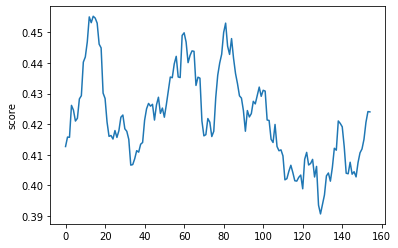

In [404]:
import seaborn as sns
sns.lineplot(x=df_time_series6.index, y="score", data=df_time_series6)

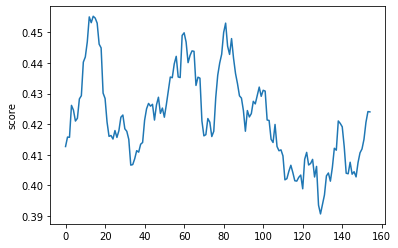

In [371]:
import seaborn as sns
sns.lineplot(x=df_time_series4.index, y="score", data=df_time_series4)

In [84]:
words = [x.lower() for x in re.findall(r"[\w\@\#\'\&\]\*\-\/\[\=\;]+",raw_text_clean,flags=re.UNICODE)]
lines = raw_text_clean.split("\n")

In [88]:
kwords = []
klines = []
for i in range(len(lines)):
    if lines[i][0:3] != "<b>":
      tmpwords = [x.lower() for x in re.findall(r"[\w\@\#\'\&\]\*\-\/\[\=\;]+",lines[i],flags=re.UNICODE)]
      kwords.extend(tmpwords)
      klines.extend([i for j in range(len(tmpwords))])

In [126]:
tmpwords = [x.lower() for x in re.findall(r"[\w\@\#\'\&\]\*\-\/\[\=\;]+",lines[9],flags=re.UNICODE)]

In [127]:
tmpwords

['written', 'by']

In [129]:
klines[0]

4

In [175]:
f = codecs.open("./imsdb_download_all_scripts/scripts/casablanca.txt","r","utf8")
saturday = f.read()
f.close()

In [196]:
sat = 'I am outstanding and happy and overjoyed'

In [197]:
satValence,satFvec = labMTsimple.storyLab.emotion(sat,labMT,shift=True, happsList=labMTvector)

In [237]:
satFvec

[0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [239]:
labMT

{'laughter': ['1', '8.50', '0.9313', '3600', '--', '--', '1728\r\n'],
 'happiness': ['2', '8.44', '0.9723', '1853', '2458', '--', '1230\r\n'],
 'love': ['3', '8.42', '1.1082', '25', '317', '328', '23\r\n'],
 'happy': ['4', '8.30', '0.9949', '65', '1372', '1313', '375\r\n'],
 'laughed': ['5', '8.26', '1.1572', '3334', '3542', '--', '2332\r\n'],
 'laugh': ['6', '8.22', '1.3746', '1002', '3998', '4488', '647\r\n'],
 'laughing': ['7', '8.20', '1.1066', '1579', '--', '--', '1122\r\n'],
 'excellent': ['8', '8.18', '1.1008', '1496', '1756', '3155', '--\r\n'],
 'laughs': ['9', '8.18', '1.1551', '3554', '--', '--', '2856\r\n'],
 'joy': ['10', '8.16', '1.0568', '988', '2336', '2723', '809\r\n'],
 'successful': ['11', '8.16', '1.0759', '2176', '1198', '1565', '--\r\n'],
 'win': ['12', '8.12', '1.0812', '154', '3031', '776', '694\r\n'],
 'rainbow': ['13', '8.10', '0.9949', '2726', '--', '--', '1723\r\n'],
 'smile': ['14', '8.10', '1.0152', '925', '2666', '2898', '349\r\n'],
 'won': ['15', '8.10', 

In [208]:
from textblob import TextBlob

TextBlob("not a very great calculation").sentiment

Sentiment(polarity=-0.3076923076923077, subjectivity=0.5769230769230769)

In [242]:
file = codecs.open('./NRC-VAD-Lexicon-Aug2018Release/NRC-VAD-Lexicon-Aug2018Release/NRC-VAD-Lexicon.txt','r','utf8')

In [246]:
newDict = dict([(line.split(u'\t')[0].rstrip(u'"').lstrip(u'"'),
                 [x.rstrip(u'"') for x in line.split(u'\t')[1:]]) for line in file])

In [372]:
newdf = pd.read_csv('./NRC-VAD-Lexicon-Aug2018Release/NRC-VAD-Lexicon-Aug2018Release/NRC-VAD-Lexicon.txt', sep='\t')

In [373]:
columnsTitles=["Word","Arousal","Valence","Dominance"]
newdf=newdf.reindex(columns=columnsTitles)

In [376]:
# newdf2 = newdf.round(2)
newdf3 = newdf.copy()

In [377]:
import numpy as np
newdf3['Ranking'] = np.arange(1, len(newdf3)+1)

In [378]:
columnsTitles=["Word","Ranking","Arousal","Valence","Dominance"]
newdf3=newdf3.reindex(columns=columnsTitles)

In [379]:
stringdf3 = newdf3.copy()
stringdf3['Ranking'] = stringdf3['Ranking'].astype(str)
stringdf3['Arousal'] = stringdf3['Arousal'].astype(str)

In [380]:
stringdf3['Valence'] = stringdf3['Valence'].astype(str)
stringdf3['Dominance'] = stringdf3['Dominance'].astype(str)

In [381]:
ndict4 = stringdf3.set_index('Word').T.to_dict('list')

In [382]:
ndict4

{'aaaaaaah': ['1', '0.606', '0.479', '0.29100000000000004'],
 'aaaah': ['2', '0.636', '0.52', '0.282'],
 'aardvark': ['3', '0.49', '0.42700000000000005', '0.43700000000000006'],
 'aback': ['4', '0.40700000000000003', '0.385', '0.28800000000000003'],
 'abacus': ['5', '0.276', '0.51', '0.485'],
 'abalone': ['6', '0.48', '0.5', '0.41200000000000003'],
 'abandon': ['7', '0.519', '0.052000000000000005', '0.245'],
 'abandoned': ['8', '0.48100000000000004', '0.046', '0.13'],
 'abandonment': ['9', '0.43', '0.128', '0.20199999999999999'],
 'abashed': ['10', '0.644', '0.177', '0.307'],
 'abate': ['11', '0.696', '0.255', '0.604'],
 'abatement': ['12', '0.33799999999999997', '0.38799999999999996', '0.336'],
 'abba': ['13', '0.5', '0.562', '0.48'],
 'abbey': ['14', '0.36700000000000005', '0.58', '0.444'],
 'abbot': ['15', '0.321', '0.42700000000000005', '0.483'],
 'abbreviate': ['16', '0.375', '0.531', '0.33'],
 'abbreviation': ['17', '0.306', '0.469', '0.345'],
 'abdomen': ['18', '0.462', '0.469',

In [283]:
nlist = newdf['Arousal'].tolist()

In [286]:
wlist = newdf['Word'].tolist()

In [383]:
labMT = ndict4
labMTvector = nlist
labMTwordList = wlist

In [302]:
len(labMT)

20007